# gw2 3:2 Bifurcation Diagrams

# Inits

In [1]:
import sys; sys.path.insert(0, '..') # add parent folder path where lib folder is
# user-defined
import nmCoupling as nm
# import nmCoupling_old as nm
import response as rp

import gw2

from lib.util import (get_phase, freq_est, get_tongue_1d, pl_exist_1d, 
get_period, bif1d, follow_phase_diffs, phase_lock_r3d, follow_locking_3d)

from lib.rhs import _redu_3dc_gw as _redu_3dc

from lib.rhs import _redu_c,_full
from lib.plot_util import add_diagram_1d_scatter, quick_plot_combined

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import sympy as sym

from scipy.optimize import root,bisect
from copy import deepcopy
import os

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

nmc = nm.nmCoupling
rsp = rp.Response

## Dicts

In [2]:
kw_sim = {'rtol':1e-8,'atol':1e-8,'method':'LSODA'}

In [3]:
pd1 = {'v1':.84,'v2':.42,'v4':.35,'v6':.35,'v8':1,
           'k1':1,'k2':1,'k3':.7,'k4':1,'k5':.7,
           'k6':1,'k7':.35,'k8':1,'K':0.5,'kc':1,
           'n':6,'L':0,'eps':0,'del':0,'om':1,'om_fix':1}

In [4]:
kws1 = {'var_names':['x','y','z','v'],
        'pardict':pd1,
        'rhs':gw2.rhs,
        'coupling':gw2.coupling,
        'init':np.array([.3882,.523,1.357,.4347,24.2]),
        'TN':10000,
        'trunc_order':5,
        'z_forward':False,
        'i_forward':[False,True,False,False,False,False,False,False],
        'i_bad_dx':[False,True,False,False,False,False,False,False],
        'max_iter':50,
        'rtol':1e-12,
        'atol':1e-12,
        'rel_tol':1e-9,
        'save_fig':False,
        'lc_prominence':.05,
        'factor':0.5}

## Defs

In [5]:
kw_bif = {'method':'LSODA','dense_output':True,'rtol':1e-9,'atol':1e-9}

In [6]:
eps_list32r = np.linspace(0.001,.1,50)
etup32 = (.001,.1,50)

In [7]:
x_temp = np.linspace(-np.pi,3*np.pi,500)

## Initialize Response Functions

In [8]:
system1 = rsp(idx=0,model_name='gw0',**kws1)
system2 = rsp(idx=1,model_name='gw1',**kws1)

mkdir ./data/gw0/
* Loading LC data...
self.T 6.283185307179586 omfix 3.8590183230656914
* Loading monodromy...
* Floquet Exponent kappa =-0.15846659975489297
* Loading g symbolic...
* Computing g...
* Loading heterogeneous terms...
* Computing z...
* Computing i...
mkdir ./data/gw1/
* Loading LC data...
self.T 6.283185307179586 omfix 3.8590183230656914
* Loading monodromy...
* Floquet Exponent kappa =-0.15846659975489297
* Loading g symbolic...
* Computing g...
* Loading heterogeneous terms...
* Computing z...
* Computing i...


In [9]:
kw_nm = {'system1':system1,'system2':system2,'_n':('om0',3),'_m':('om1',2),
         'NH':2048,'save_fig':False}

# del=0.0

In [10]:
del32_p0 = 0
a32_p0 = nm.nmCoupling(**kw_nm, del1=del32_p0)

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H gw0, order=0...
* Loading H gw1, order=0...
* Loading H gw0, order=1...
* Loading H gw1, order=1...
* Loading H gw0, order=2...
* Loading H gw1, order=2...
* Loading H gw0, order=3...
* Loading H gw1, order=3...
* Loading H gw0, order=4...
* Loading H gw1, order=4...
* Loading H gw0, order=5...
* Loading H gw1, order=5...


## Get Branches Full

In [11]:
kw_p0 = {'a':a32_p0,'del1':del32_p0,'recompute':False,'bifdir':'bif1d_gw2/',
        '_full_rhs':_full}

In [12]:
data_p0_list = []

In [13]:
# top 1
dat = follow_phase_diffs(init=0,eps_init=0.01,eps_final=0.105,
                         deps=.005,**kw_p0)
data_p0_list.append(dat)

In [14]:
dat = follow_phase_diffs(init=0,eps_init=0.01,eps_final=0.005,
                         deps=-.002,**kw_p0)
data_p0_list.append(dat)

## Get Branches 3D

In [15]:
data_r3d_p0_list = []

In [16]:
# find init for this branch
_,init = phase_lock_r3d([1,0,0],a32_p0,.05,_redu_3dc)
print(init)

t_diff 1.75126889628927352, Y=[14.31763951 -0.04008444 -0.04001835]                                              
[ 1.7513 -0.0401 -0.04  ]


In [17]:
# bot 1f
dat = follow_locking_3d(init,a32_p0,(.05,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

In [18]:
# bot 1b
dat = follow_locking_3d(init,a32_p0,(.05,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

In [19]:
# find init for this branch
_,init = phase_lock_r3d([3,0,0],a32_p0,.05,_redu_3dc)

t_diff 3.30622604999163630, Y=[ 3.30622605 -0.03927968 -0.03915925]                                              


In [20]:
# top 1f
dat = follow_locking_3d(init,a32_p0,(.05,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

In [21]:
# top 1b
dat = follow_locking_3d(init,a32_p0,(.05,.001,-.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

In [22]:
# find init for this branch
_,init = phase_lock_r3d([5,0,0],a32_p0,.05,_redu_3dc)

t_diff 4.90857593067278408, Y=[ 4.90857593 -0.04028997 -0.04033305]                                              


In [23]:
# top 1f
dat = follow_locking_3d(init,a32_p0,(.05,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

In [24]:
# top 1b
dat = follow_locking_3d(init,a32_p0,(.05,.001,-.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0_list.append(dat)

## Plot

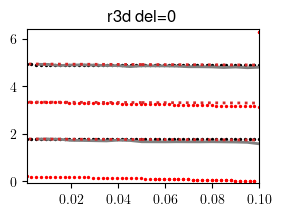

In [25]:
quick_plot_combined(a32_p0,
                    kw_f={'data_list':data_p0_list},
                    kw_r3d={'data_list':data_r3d_p0_list},
                    kw_r={'etup':etup32})

# del=0.002

In [26]:
del32_p002 = 0.002
a32_p002 = nm.nmCoupling(**kw_nm, del1=del32_p002)

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H gw0, order=0...
* Loading H gw1, order=0...
* Loading H gw0, order=1...
* Loading H gw1, order=1...
* Loading H gw0, order=2...
* Loading H gw1, order=2...
* Loading H gw0, order=3...
* Loading H gw1, order=3...
* Loading H gw0, order=4...
* Loading H gw1, order=4...
* Loading H gw0, order=5...
* Loading H gw1, order=5...


## Get Branches Full

In [27]:
kw_p002 = {'a':a32_p002, 'del1':del32_p002, 'recompute':False,
           'bifdir':'bif1d_gw2/', '_full_rhs':_full}

In [28]:
data_p002_list = []

In [29]:
# top 1
dat = follow_phase_diffs(init=2,eps_init=0.01,eps_final=0.11,
                         deps=.01,**kw_p002)
data_p002_list.append(dat)

In [30]:
dat = follow_phase_diffs(init=2,eps_init=0.01, eps_final=0.001,
                         deps=-.001,**kw_p002)
data_p002_list.append(dat)

## Get Branches 3D

In [31]:
data_r3d_p002_list = []

In [32]:
# find init for this branch
_,init = phase_lock_r3d([1,0,0],a32_p002,.05,_redu_3dc)
print(init)

t_diff 6.25545528769334410, Y=[18.8218259  -0.05276202 -0.04236844]                                              
[ 6.2555 -0.0528 -0.0424]


In [33]:
# bot 1f
dat = follow_locking_3d(init,a32_p002,(.05,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p002_list.append(dat)

In [34]:
# bot 1b
dat = follow_locking_3d(init,a32_p002,(.05,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p002_list.append(dat)

In [35]:
# find init for this branch
_,init = phase_lock_r3d([3,0,0],a32_p002,.05,_redu_3dc)

t_diff 3.10244235622492710, Y=[ 3.10244236 -0.05324429 -0.04272767]                                              


In [36]:
# top 1f
dat = follow_locking_3d(init,a32_p002,(.05,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p002_list.append(dat)

In [37]:
# top 1b
dat = follow_locking_3d(init,a32_p002,(.05,.001,-.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p002_list.append(dat)

In [38]:
# find init for this branch
_,init = phase_lock_r3d([5,0,0],a32_p002,.05,_redu_3dc)

t_diff 5.13353933037483609, Y=[ 5.13353933 -0.05404592 -0.04377059]                                              


In [39]:
# top 1f
dat = follow_locking_3d(init,a32_p002,(.05,.11,.01),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p002_list.append(dat)

In [40]:
# top 1b
dat = follow_locking_3d(init,a32_p002,(.05,.001,-.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p002_list.append(dat)

## Plot

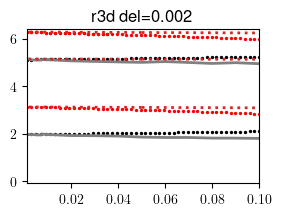

In [41]:
quick_plot_combined(a32_p002,
                    kw_f={'data_list':data_p002_list},
                    kw_r3d={'data_list':data_r3d_p002_list},
                    kw_r={'etup':etup32})

# del=0.0045

In [42]:
del32_p0045 = 0.0045
a32_p0045 = nm.nmCoupling(**kw_nm, del1=del32_p0045)

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H gw0, order=0...
* Loading H gw1, order=0...
* Loading H gw0, order=1...
* Loading H gw1, order=1...
* Loading H gw0, order=2...
* Loading H gw1, order=2...
* Loading H gw0, order=3...
* Loading H gw1, order=3...
* Loading H gw0, order=4...
* Loading H gw1, order=4...
* Loading H gw0, order=5...
* Loading H gw1, order=5...


## Get Branches Full

In [43]:
kw_p0045 = {'a':a32_p0045,'del1':del32_p0045,'recompute':False,
            'bifdir':'bif1d_gw2/','_full_rhs':_full}

In [44]:
data_p0045_list = []

In [45]:
# top 1
dat = follow_phase_diffs(init=0,eps_init=0.01,eps_final=0.1,
                         deps=.01,**kw_p0045)
data_p0045_list.append(dat)

In [46]:
dat = follow_phase_diffs(init=0,eps_init=0.01,eps_final=0.0005,deps=-.002,
                         **kw_p0045)
data_p0045_list.append(dat)

## Get Branches 3D

In [47]:
data_r3d_p0045_list = []

In [48]:
# find init for this branch
_,init = phase_lock_r3d([1,0,0],a32_p0045,.02,_redu_3dc)
print(init)

t_diff 2.36482099749620641, Y=[ 2.74975622e+01 -2.80262550e-02 -1.88048001e-02]                                              
[ 2.3648 -0.028  -0.0188]


In [49]:
# bot 1f
dat = follow_locking_3d(init,a32_p0045,(.02,.1,.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0045_list.append(dat)

In [50]:
# bot 1b
dat = follow_locking_3d(init,a32_p0045,(.02,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0045_list.append(dat)

In [51]:
# # find init for this branch
# _,init = phase_lock_r3d([3,0,0],a32_p0045,.02,_redu_3dc)

In [52]:
# # top 1f
# dat = follow_locking_3d(init,a32_p0045,(.02,.1,.002),
#                         rhs=_redu_3dc,recompute=False)
# data_r3d_p0045_list.append(dat)

In [53]:
# # top 1b
# dat = follow_locking_3d(init,a32_p0045,(.02,.001,-.001),
#                         rhs=_redu_3dc,recompute=False)
# data_r3d_p0045_list.append(dat)

In [54]:
# find init for this branch
_,init = phase_lock_r3d([5,0,0],a32_p0045,.02,_redu_3dc)

t_diff 5.52596243394381510, Y=[ 5.52596243 -0.02796603 -0.01882862]                                              


In [55]:
# top 1f
dat = follow_locking_3d(init,a32_p0045,(.02,.1,.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0045_list.append(dat)

In [56]:
# top 1b
dat = follow_locking_3d(init,a32_p0045,(.02,.001,-.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0045_list.append(dat)

## Plot

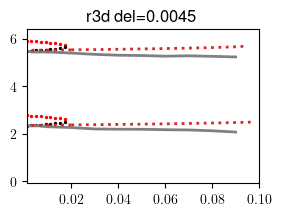

In [57]:
quick_plot_combined(a32_p0045,
                    kw_f={'data_list':data_p0045_list},
                    kw_r3d={'data_list':data_r3d_p0045_list},
                    kw_r={'etup':etup32})

# del=0.0047

In [58]:
del32_p0047 = 0.0047
a32_p0047 = nm.nmCoupling(**kw_nm, del1=del32_p0047)

pfactor 4
* Loading p symbolic...
* Loading p symbolic...
* Loading H symbolic...
* Loading H symbolic...
* Loading H gw0, order=0...
* Loading H gw1, order=0...
* Loading H gw0, order=1...
* Loading H gw1, order=1...
* Loading H gw0, order=2...
* Loading H gw1, order=2...
* Loading H gw0, order=3...
* Loading H gw1, order=3...
* Loading H gw0, order=4...
* Loading H gw1, order=4...
* Loading H gw0, order=5...
* Loading H gw1, order=5...


## Get Branches Full

In [59]:
kw_p0047 = {'a':a32_p0047,'del1':del32_p0047,'recompute':False,
            'bifdir':'bif1d_gw2/','_full_rhs':_full}

In [60]:
data_p0047_list = []

In [61]:
# top 1
dat = follow_phase_diffs(init=2,eps_init=0.005,eps_final=0.1,
                         deps=.005,**kw_p0047)
data_p0047_list.append(dat)

In [62]:
dat = follow_phase_diffs(init=2,eps_init=0.005,eps_final=0.001,
                         deps=-.001,**kw_p0047)
data_p0047_list.append(dat)

## Get Branches 3D

In [63]:
data_r3d_p0047_list = []

In [64]:
# find init for this branch
_,init = phase_lock_r3d([1,0,0],a32_p0047,.02,_redu_3dc)
print(init)

t_diff 2.43338678467215538, Y=[ 2.75661280e+01 -2.85492805e-02 -1.89133385e-02]                                              
[ 2.4334 -0.0285 -0.0189]


In [65]:
# bot 1f
dat = follow_locking_3d(init,a32_p0047,(.02,.054,.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0047_list.append(dat)

In [66]:
# bot 1b
dat = follow_locking_3d(init,a32_p0047,(.02,.001,-.001),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0047_list.append(dat)

In [67]:
# # find init for this branch
# _,init = phase_lock_r3d([3,0,0],a32_p0047,.02,_redu_3dc)

In [68]:
# # top 1f
# dat = follow_locking_3d(init,a32_p0047,(.02,.056,.002),
#                         rhs=_redu_3dc,recompute=False)
# data_r3d_p0047_list.append(dat)

In [69]:
# # top 1b
# dat = follow_locking_3d(init,a32_p0047,(.02,.001,-.001),
#                         rhs=_redu_3dc,recompute=False)
# data_r3d_p0047_list.append(dat)

In [70]:
# find init for this branch
_,init = phase_lock_r3d([5,0,0],a32_p0047,.02,_redu_3dc)

t_diff 5.59701596224741912, Y=[ 5.59701596 -0.02846868 -0.01891731]                                              


In [71]:
# top 1f
dat = follow_locking_3d(init,a32_p0047,(.02,.05,.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0047_list.append(dat)

In [72]:
# top 1b
dat = follow_locking_3d(init,a32_p0047,(.02,.001,-.002),
                        rhs=_redu_3dc,recompute=False)
data_r3d_p0047_list.append(dat)

## Plot

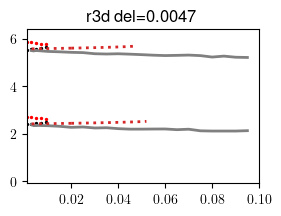

In [73]:
quick_plot_combined(a32_p0047,
                    kw_f={'data_list':data_p0047_list},
                    kw_r3d={'data_list':data_r3d_p0047_list},
                    kw_r={'etup':etup32})

## Sims

In [83]:
# coupling and init
eps32_p0047 = 0.09
th_init32_p0047 = 2

In [84]:
# sim params
dt = .01;T_p0047=1000
t32_p0047 = np.arange(0,T_p0047,dt)
args32_p0047 = {'args':(a32_p0047,eps32_p0047,del32_p0047),
             't_eval':t32_p0047,**kw_sim,'dense_output':True}

In [85]:
# initialize and run full
y0a = a32_p0047.system1.lc['dat'][int((th_init32_p0047/(2*np.pi)) * a32_p0047.system1.TN),:]
y0b = a32_p0047.system2.lc['dat'][int((0/(2*np.pi)) * a32_p0047.system2.TN),:]

y0_p0047 = np.array([y0a,y0b]).flatten()

solf32_p0047 = solve_ivp(_full,[0,t32_p0047[-1]],
                        y0_p0047, **args32_p0047)

In [86]:
solr32_p0047 = solve_ivp(_redu_c,[0,t32_p0047[-1]],
                     [th_init32_p0047],**args32_p0047)

In [87]:
# solr12b_p0047 = solve_ivp(_redu_3dc,[0,t32_p0047[-1]],
#                     [th_init32_p0047,0,0],**args32_p0047)

In [88]:
tp12a_p0047, phase12a_p0047 = get_phase(t32_p0047,solf32_p0047.y.T[:,:4],
                            skipn=50,system1=a32_p0047.system1)
tp12b_p0047, phase12b_p0047 = get_phase(t32_p0047,solf32_p0047.y.T[:,4:],
                            skipn=50,system1=a32_p0047.system2)

(-0.5, 6.783185307179586)

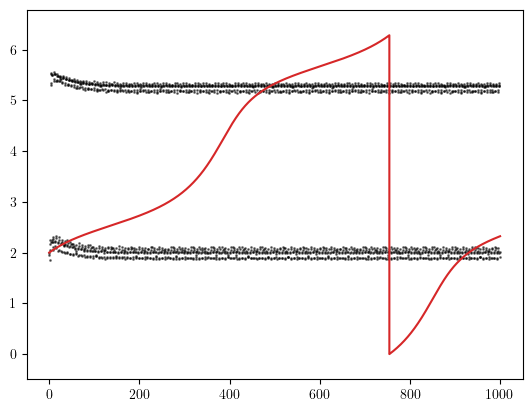

In [89]:
fig,axs = plt.subplots()
y = np.mod(phase12a_p0047 - a32_p0047.om*phase12b_p0047,2*np.pi)
axs.scatter(tp12a_p0047,y,s=1,alpha=.5,color='black')

axs.plot(t32_p0047,np.mod(solr32_p0047.y.T,2*np.pi),
         color='tab:red')

axs.set_ylim(-.5,2*np.pi+.5)

## Integrate Reduced Check

In [81]:
# multiple initial conditions
init_phases32_p0047 = np.linspace(0,2*np.pi,6,endpoint=False)
t3d_p0047 = np.arange(0,5000,.01)

sols_3d = []
sols_1d = []

for i in range(len(init_phases32_p0047)):
    sol3d_p0047 = solve_ivp(_redu_3dc,[0,t3d_p0047[-1]],
                           [init_phases32_p0047[i],0,0],
                           args=(a32_p0047,.05),t_eval=t3d_p0047)
    
    # sol1d_p0047 = solve_ivp(_redu_c,[0,t3d_p0047[-1]],
    #                        [init_phases32_p0047[i]],
    #                        args=(a32_p0047,.05),t_eval=t3d_p0047)
    
    sols_3d.append(sol3d_p0047)
    # sols_1d.append(sol1d_p0047)

phase 0.0 [ 2.49377773 -0.07256063 -0.04789063]
phase 1.0471975511965976 [ 2.49559072 -0.07257384 -0.0478569 ]
phase 2.0943951023931953 [ 2.49730628 -0.07260775 -0.04778549]
phase 3.141592653589793 [ 5.67165784 -0.07234529 -0.04785017]
phase 4.1887902047863905 [ 5.67470441 -0.07237443 -0.04778497]
phase 5.235987755982988 [ 5.6777843  -0.07235508 -0.04780341]


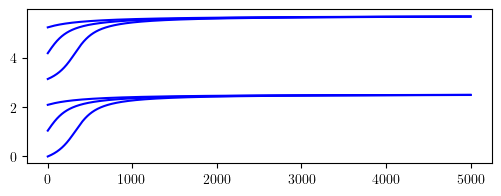

In [82]:
fig,axs = plt.subplots(figsize=(6,2))
for i in range(len(init_phases32_p0047)):
    axs.plot(t3d_p0047,sols_3d[i].y[0],color='blue')
    # axs.plot(t3d_p0047,sols_1d[i].y[0],color='red')
    print('phase',init_phases32_p0047[i],sols_3d[i].y.T[-1,:])